# Блок №3 минипроект

___
### Задачи
1. Импортируйте библиотеку `pandas` как `pd`. Загрузите два датасета `user_data` и `log`s. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (`success == True`)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя `sns.countplot` (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
### Описание данных
[user_data](https://disk.yandex.ru/d/OO5NC1HYP6Ntug):
+ client – идентификатор пользователя
+ premium – является ли клиент премиум
+ age – возраст

[logs](https://disk.yandex.ru/d/E67ttPSdZP2Itg):
+ client – идентификатор пользователя
+ success – результат (успех - 1, нет - 0)
+ platform – платформа
+ time – время в формате Unix

# Задание 1
___
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [1]:
# Импортируем нужные библиотеки для анализа данных
import pandas as pd

# Импортируем библиотеки для работы с графиками
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для отображения графиков
%matplotlib inline

In [3]:
# Пути к файлам на локальном компьютере
path_user_data = '/home/jupyter-a.stamati-16/Lectures_3/3_user_data.csv'
path_logs = '/home/jupyter-a.stamati-16/Lectures_3/3_logs.csv'

In [4]:
# Импортируем дата фремй user_data
user_data =  pd.read_csv(path_user_data)

In [33]:
# Посмотрим на данные
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
# Посмотрим размер таблицы
user_data.shape

(2954, 3)

In [7]:
# Посмотрим на тип переменных
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [9]:
# Посмотрим на описательную статистику данных
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [13]:
# Проверим есть ли пропуски в данных
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [10]:
# Импортируем дата фрейм logs
logs = pd.read_csv(path_logs)

In [11]:
# Посмотрим на данные
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [12]:
# Посмотрим размер таблицы
logs.shape

(4500, 4)

In [14]:
# Посмотрим на тип переменных
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [16]:
# Посмотрим на описательную статистику данных
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [17]:
# Проверим есть ли пропуски в данных
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [19]:
# Посмотрим на количество ращличных platform
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [20]:
# Ответим на вопрос задачи, количество уникальных значений platform
logs.platform.value_counts().count()

3

In [21]:
# Ответ можно получить другим способом
logs.platform.nunique()

3

# Задание 2
___
Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (`client`) через запятую и пробел в порядке возрастания. Например:
```
12, 123, 456
```

In [54]:
# Отберем пользователь совершивших успешное действие
# Сгруппируем и аггрегируем данные по пользователю
# Отберем данные по паксимальному количеству действий
# Отсотртируем данные по пользователю
logs_client = logs.query('success == 1') \
                .groupby('client', as_index=False) \
                .agg({'success': 'count'}) \
                .query('success == success.max()') \
                .sort_values('client')

In [55]:
# Посмотрим на получившийся результат
logs_client

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


In [41]:
# Преобразуем нужные нам данные в колонке client
logs_client_str = logs_client \
                        .client \
                        .to_string(index=False) \
                        .strip() \
                        .split('\n ')

In [56]:
# Выведем ответ в требуемом формате
print(*logs_client_str, sep=', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584


# Задание 3
___
С какой платформы осуществляется наибольшее количество успешных операций?

In [73]:
# Посмотрим на количество успешных операций с каждой платформы
logs_platform_count = logs.query('success == 1') \
                            .groupby('platform') \
                            .agg({'success': 'count'}) \
# Посмотрим на полученные данные
logs_platform_count

,success
platform,
computer,1090
phone,2019
tablet,180


In [77]:
# Найдем в какой платформе было максимальное киличество успешных дествий
logs_platform_count.idxmax().success

'phone'

# Задание 4
___
Какая платформа наиболее популярна среди премиумных клиентов?

In [84]:
# Соеденим датафреймы user_data и logs
user_logs_merge = user_data.merge(logs, on='client')

In [85]:
# Посмотрим на все платформы, которыми пользуются популярные клиенты
user_logs_platform_premium = user_logs_merge \
                                    .query('premium == True') \
                                    .value_counts('platform') \

user_logs_platform_premium

platform
phone       246
computer    150
tablet       24
dtype: int64

In [86]:
# Найдем самую популярную платформу среди премиальных клиентов
user_logs_platform_premium.idxmax()

'phone'

# Задание 5
___
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку `seaborn` с исходными параметрами. Какой график получится в результате?

Используйте датасэт, который вы получили на предыдущем шаге
![](https://ucarecdn.com/6312cd54-c828-4712-a002-b0a895159f61/)

In [48]:
user_logs_merge.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


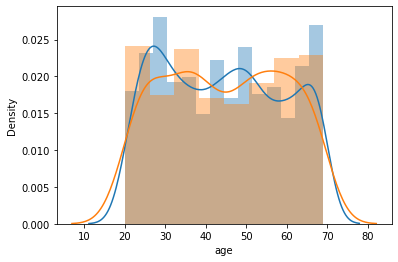

In [118]:
sns.distplot(user_logs_merge.age[user_logs_merge.premium == False], kde=True)
sns.distplot(user_logs_merge.age[user_logs_merge.premium == True], kde=True);

Ответ:
```
B
```

# Задание 6
___
Постройте график распределения числа успешных операций: 

x – число успешных операций \
y – число клиентов, совершивших столько успешных операци

In [112]:
# Отберем успешные операции и для каждого клиента посчитаем, количество таких операций 
user_logs_client_true = user_logs_merge.query('success == True') \
                                        .groupby('client') \
                                        .agg({'success': 'count'})

In [113]:
user_logs_client_true.head()

,success
client,
40,1
75,1
81,1
132,1
164,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


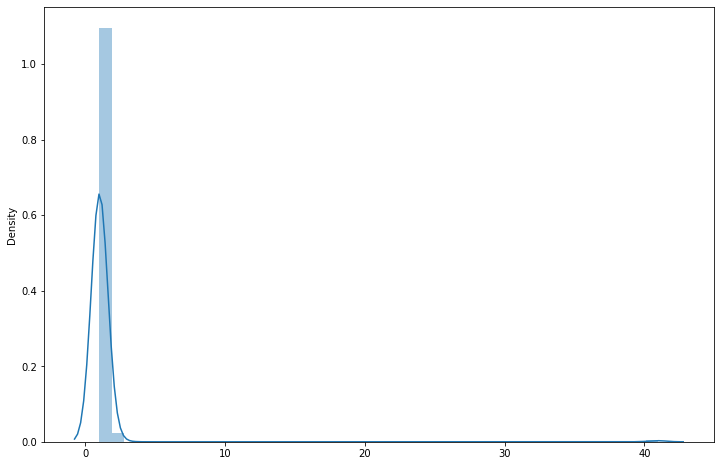

In [117]:
plt.figure(figsize=(12, 8)) 
ax = sns.distplot(user_logs_client_true, kde=True);

Ответ:
+ Несколько клиентов совершили более 40 успешных действий
+ Бóльшая часть наблюдений сосредоточена в левой части графика

# Задание 7
___
Визуализируйте число успешных операций, сделанных на платформе `computer`, в зависимости от возраста, используя `sns.countplot`. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить `plt.figure(figsize=(12, 8))` в начало соответствующей ячейки. 

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [119]:
# Отберем необъодимые данные
user_logs_true_computer =  user_logs_merge.query('success == True and platform == "computer"')

In [120]:
user_logs_true_computer.head()

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108


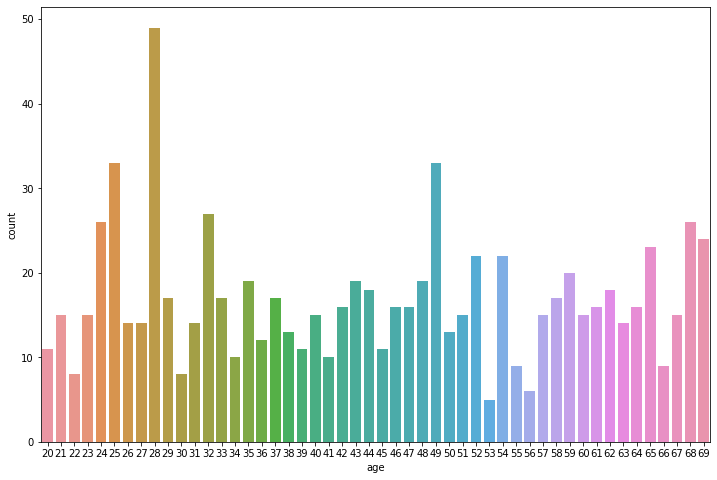

In [121]:
# Визуализируем данные
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="age", data=user_logs_true_computer)